# Machine Learning on Unbalanced Dataset
**Dataset**: Diabetes Health Indicators Dataset (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

## 1. Prerequisite

In [1]:
# Importing modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

## 2. Data Loading

In [2]:
# Reading data
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
# Removing duplicates
df.drop_duplicates(inplace = True)

# Combine prediabetes(1) and diabetes (2) into single class (1)
label_map = {0:0, 1:1, 2:1}
df['Diabetes_012'] = df['Diabetes_012'].map(label_map)
# 0 is for no diabetes or only during pregnancy
# 1 is for prediabetes or diabetes

In [4]:
# Feature matrix
x = df.drop("Diabetes_012", axis=1)

# Target labels
y = df["Diabetes_012"].astype(int)

## 3. Data Summary

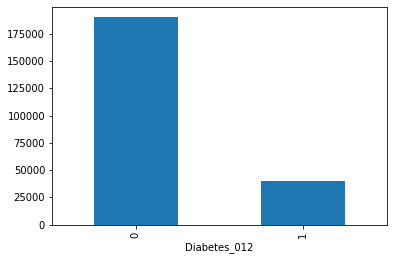

In [5]:
bar = y.value_counts().plot.bar()

# From the barplot below it can be seen that the data is not balanced and
# class 1 (prediabetes + diabetes) is underrepresented in the data

## 4. ML without Oversampling/Undersampling

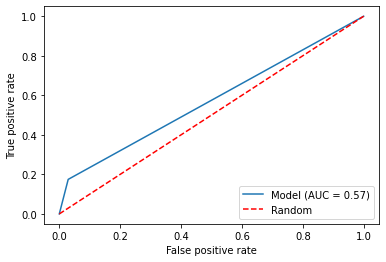

In [6]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

# Feature scaling
sds = StandardScaler()
x_train = sds.fit_transform(x_train)
x_test = sds.transform(x_test)

# Model
model = LogisticRegression()

# Training
model.fit(x_train, y_train)

# Testing
y_pred = model.predict(x_test)

# Performance metric
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='Model (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], '--', color='r', label='Random')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

## 5. ML with Oversampling/Undersampling

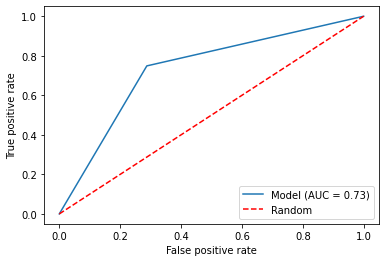

In [7]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

# Oversampling
ros = RandomOverSampler(random_state=42)
x_train, y_train = ros.fit_resample(x_train, y_train)

# Undersampling
# rus = RandomUnderSampler(random_state=42)
# x_train, y_train = rus.fit_resample(x_train, y_train)

# Feature scaling
sds = StandardScaler()
x_train = sds.fit_transform(x_train)
x_test = sds.transform(x_test)

# Model
model = LogisticRegression()

# Training
model.fit(x_train, y_train)

# Testing
y_pred = model.predict(x_test)

# Performance metric
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='Model (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], '--', color='r', label='Random')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()